In [1]:
from invisible_cities.cities.components import wf_from_files, WfType
from invisible_cities.cities.components import deconv_pmt, calibrate_pmts, get_pmt_wfs, load_dst
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tables as tb
import os
from scipy.optimize import curve_fit
from matplotlib.cm import get_cmap

In [2]:
wfms = pd.read_hdf("DEMO_Slim_S2only.h5","wfm")
display(wfms)

,times,sumwf,z,event
15401,385.025,0.048278,171.821167,38737
15402,385.050,-0.006937,171.821167,38737
15403,385.075,0.152161,171.821167,38737
15404,385.100,0.149264,171.821167,38737
15405,385.125,-0.163162,171.821167,38737
...,...,...,...,...
16995,424.875,-0.156298,255.609100,22109
16996,424.900,-0.313945,255.609100,22109
16997,424.925,-0.000149,255.609100,22109
16998,424.950,-0.001585,255.609100,22109


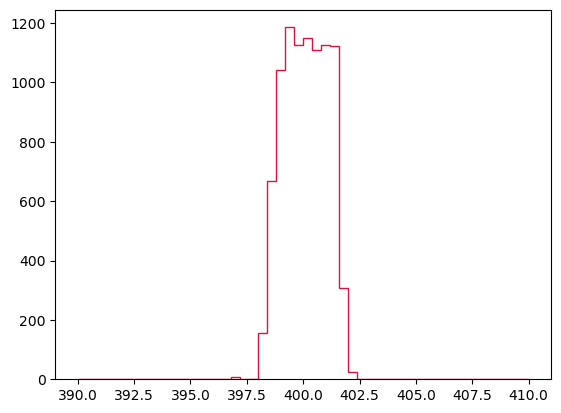

In [34]:
# Load in the simulation

nexusgarf = pd.read_hdf("../data/DEMO/nexus/DEMOpp_Kr_garfnexus_merged.h5", "waveforms")
z = 1
nexusgarf = nexusgarf[nexusgarf.event_id == z]


3.0000000000001137


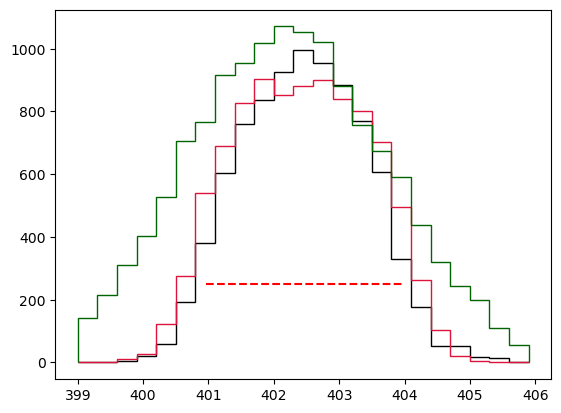

In [118]:
nexusgarf = pd.read_hdf("../data/DEMO/nexus/DEMOpp_Kr_garfnexus_merged.h5", "waveforms")
nexus = pd.read_hdf("/Users/mistryk2/Packages/GarfieldNexus/nexus/DEMOpp_waveform_simple.h5", "waveform")
z = 12
nexusgarf = nexusgarf[nexusgarf.event_id == z]

event = wfms[wfms.event == 76843]

plt.figure()
counts, bins, _ = plt.hist(event.times, weights = event.sumwf, histtype = "step", color = "black", bins = np.arange(399,406,.3))
bin_centers = (bins[:-1] + bins[1:]) / 2

df = pd.DataFrame({"time": bin_centers, "counts" : counts})
mean = np.average(df.time, weights = df.counts)
df = df [df.counts > max(df.counts)/4]
width = max(df.time) - min(df.time)
print(width)

x = [mean-width/2, mean+width/2]

plt.plot(x,[max(df.counts)/4,max(df.counts)/4], color='red', linestyle='--')

counts, bins, _ = plt.hist(nexusgarf.time_bin-(z+2.1)/.958625+mean, weights = nexusgarf.charge, histtype = "step",  bins = np.arange(399,406,.3), label="GARFNEXUS 13mm", color = "crimson")
# plt.figure()
counts, bins, _ = plt.hist(nexus.time+275, weights = nexus.charge, histtype = "step",  bins = np.arange(399,406,.3), label="NEXUS 13mm", color = "darkgreen")




40521 3.0000000000001137 0.6363636363636301
13101 3.0000000000001137 0.6363636363636427
187579 3.0000000000001137 0.6363636363636427
59590 3.0000000000001137 0.6363636363636427
75409 3.0000000000001137 0.6363636363636427
76681 3.0000000000001137 0.6363636363636301
76843 3.0000000000001137 0.6999999999999811
271743 3.0000000000001137 0.6363636363636427
273126 3.0000000000001137 0.6363636363636301
224493 3.0000000000001137 0.6363636363636301
224604 3.0000000000001137 0.6363636363636301


KeyboardInterrupt: 

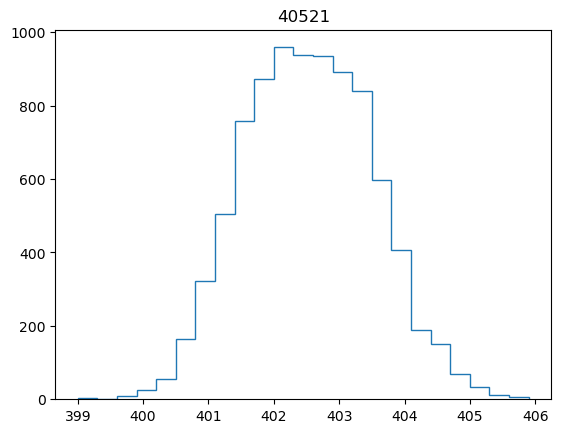

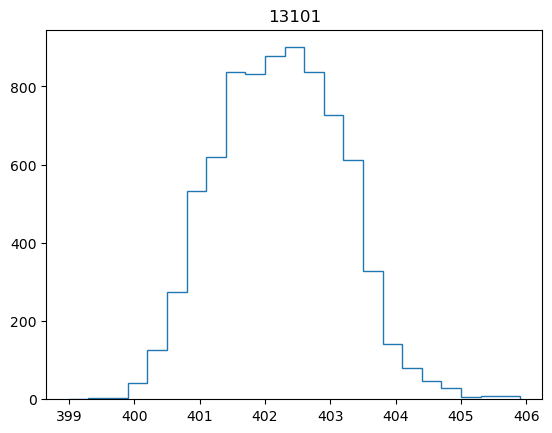

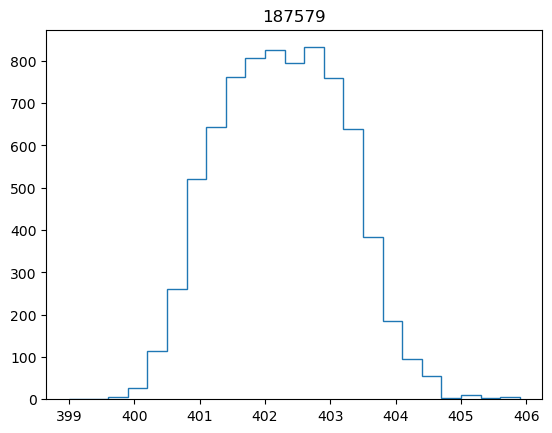

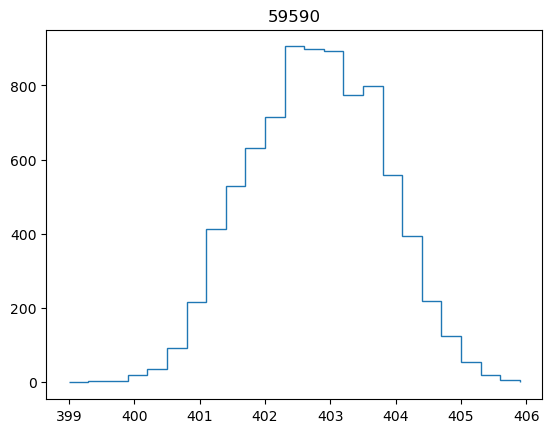

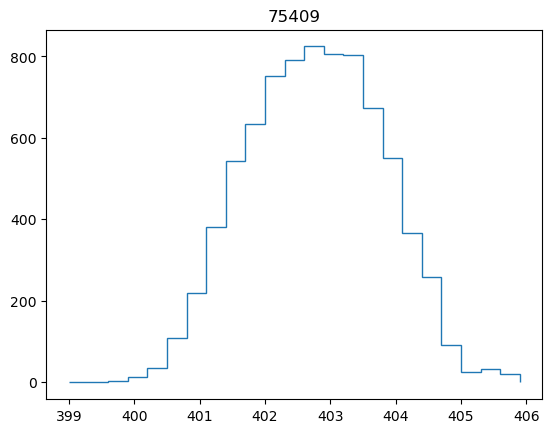

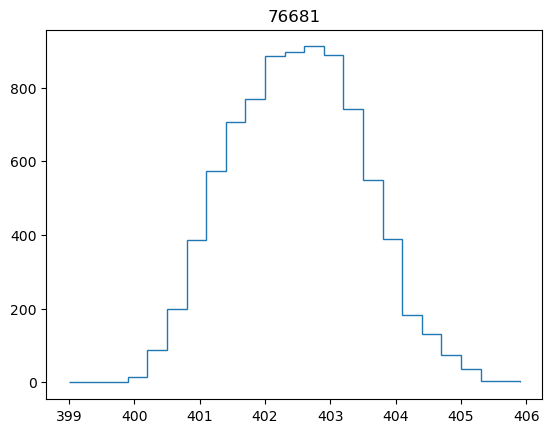

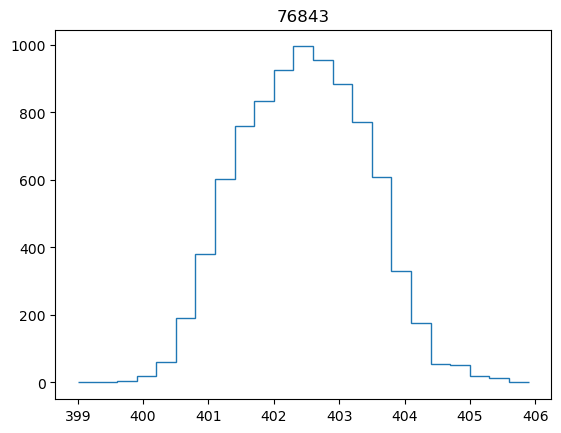

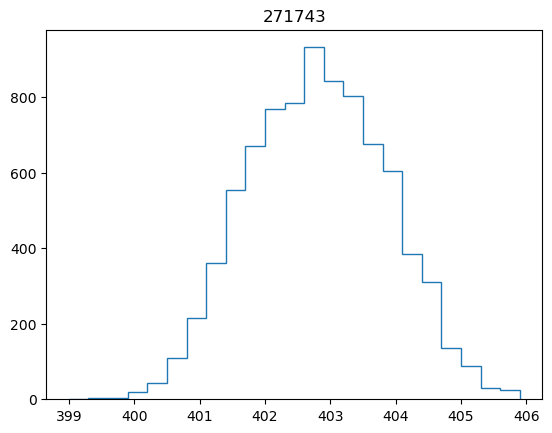

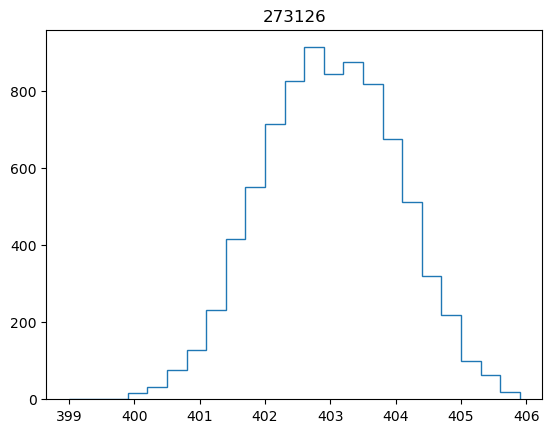

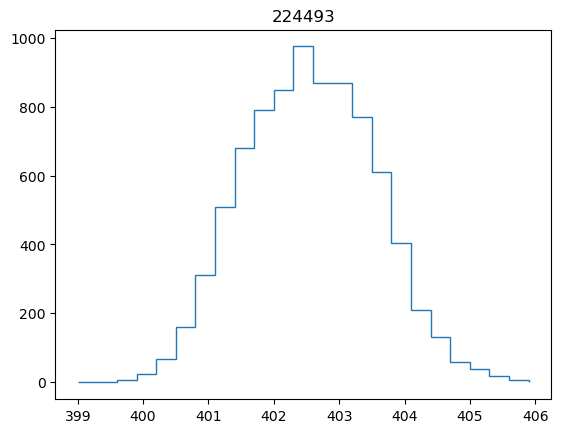

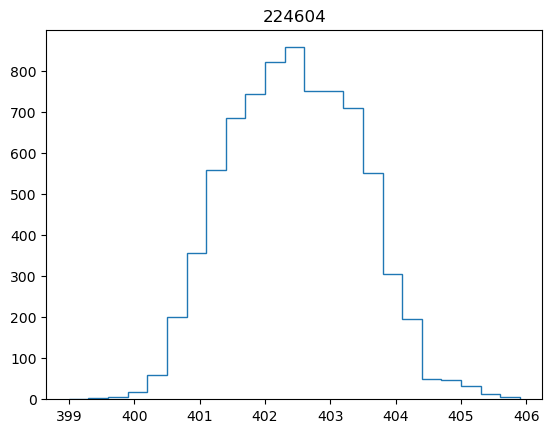

In [76]:
counter = 0
for evt in wfms.event.unique():

    event = wfms[wfms.event == evt]
    
    counts, bins = np.histogram(event.times, weights = event.sumwf, bins = np.arange(395,415,.3))
    bin_centers = (bins[:-1] + bins[1:]) / 2

    df = pd.DataFrame({"time": bin_centers, "counts" : counts})
    df2 = df
    
    mean = np.average(df.time, weights = df.counts)
    df = df [df.counts > max(df.counts)/4.5]
    width1 = max(df.time) - min(df.time)
    # print(width2)

    if (width1 < 3.5 and width1 > 1 and max(df.counts) < 1050 and max(df.counts) > 700):

        df2 = df2 [df2.counts > max(df2.counts)/1.5]
        width2 = max(df2.time) - min(df2.time)

        if (width2/width1 > 0.63):
            print(evt, width, width2/width1)
            plt.figure()
            plt.hist(event.times, weights = event.sumwf, histtype = "step", bins = np.arange(399,406,.3))
            plt.title(evt)
            counter+=1

    if counter >30: break